# Aquire dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emnist

import torch 
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [2]:
def get_data():
    X, Y = emnist.extract_training_samples('letters')
    X_test, Y_test = emnist.extract_test_samples('letters')

    return X, Y- 1, X_test, Y_test - 1

In [3]:
X, Y, X_test, Y_test = get_data()

In [4]:
X.shape

(124800, 28, 28)

In [5]:
X = torch.Tensor(np.array(X))
X_test = torch.Tensor(np.array(X_test))

In [6]:
m = X.shape[0]

In [7]:
index = torch.tensor(Y, dtype=torch.int64)
index = torch.unsqueeze(index, 1)
Y1 = torch.zeros(m, 26, dtype=index.dtype).scatter(1, index, value=1)
Y = torch.tensor(Y1, dtype=torch.long)
index2 = torch.tensor(Y_test, dtype=torch.int64)
index2 = torch.unsqueeze(index2, 1)
Y_test = torch.zeros(X_test.shape[0], 26, dtype=index2.dtype).scatter(1, index2, value=1)
Y_test = torch.tensor(Y_test, dtype=torch.float)

/tmp/ipykernel_7055/2607214113.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y1, dtype=torch.long)
/tmp/ipykernel_7055/2607214113.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_test = torch.tensor(Y_test, dtype=torch.float)


In [8]:
train_dataset = TensorDataset(X, Y)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [9]:
def show_img(i):
    plt.imshow(i,cmap='gray')

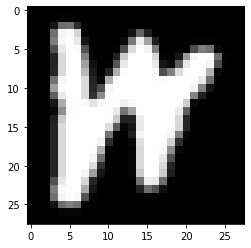

In [10]:
show_img(X[0])

In [11]:
len(X.shape)

3

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,120)
        self.fc3 = nn.Linear(120,26)
    
    def forward(self, x):
        x = x.flatten(start_dim = 0 if len(x.shape) < 3 else 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=0)
        return x

model = Net()

In [13]:
#constants 

learning_rate = 0.001
batch_size = 64
epochs = 10

In [35]:
loss_fn = nn.

In [30]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [31]:
torch.argmax(model(X[0]))

tensor(19)

In [36]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    size = len(train_dataloader.dataset)
    for batch, (x, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
print('training finished')

Epoch 1
-------------------------------


TypeError: softmax() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (int dim, torch.dtype dtype)
 * (name dim, *, torch.dtype dtype)
